# Required libraries

In [ ]:
#Required libraries
import pandas as pd               #for data analysis and data manipulation
import numpy as np                #for numerical computation
import seaborn as sns             #for data visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt   #for data visualization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf           #for machine learning and deep neural network
from tensorflow import keras

# Data Understanding from statistical perspective

## Import Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hcvdat0.xlsx to hcvdat0.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded["hcvdat0.xlsx"]))

## Overview of the dataset


In [ ]:
df.shape

(615, 14)

In [ ]:
df.head()

,ID,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df.tail()

,ID,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [ ]:
# Missing value?
df.isnull().values.any()

True

In [ ]:
print(df.shape)
print(type(df))
print(df.columns)

(615, 14)
<class 'pandas.core.frame.DataFrame'>
Index(['ID', 'Target', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      615 non-null    int64  
 1   Target  615 non-null    object 
 2   Age     615 non-null    int64  
 3   Sex     615 non-null    object 
 4   ALB     614 non-null    float64
 5   ALP     597 non-null    float64
 6   ALT     614 non-null    float64
 7   AST     615 non-null    float64
 8   BIL     615 non-null    float64
 9   CHE     615 non-null    float64
 10  CHOL    605 non-null    float64
 11  CREA    615 non-null    float64
 12  GGT     615 non-null    float64
 13  PROT    614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
# Statistical review for categorical data
df.describe()

,ID,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### 1.Target

In [ ]:
df['Target'].describe()

,Target
count,615
unique,5
top,Blood Donor
freq,533


In [ ]:
df['Target'].unique()

array(['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'], dtype=object)

In [ ]:
df9 = df.drop('Sex',axis = 1)

In [ ]:
df9.groupby('Target').mean()

,ID,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Target,,,,,,,,,,,,
Blood Donor,267.0,47.131332,42.238274,68.365103,26.631520,26.549156,8.527580,8.398086,5.494316,78.977486,29.036773,72.111257
Cirrhosis,600.5,53.466667,32.482759,93.220833,22.970000,107.456667,59.133333,3.818333,4.008571,138.223333,129.440000,70.051724
Fibrosis,575.0,52.333333,41.761905,37.841667,59.600000,81.171429,13.428571,8.334762,4.595500,73.490476,79.552381,76.100000
Hepatitis,552.5,38.708333,43.833333,42.114286,26.900000,75.733333,15.625000,9.283750,5.099167,73.958333,92.579167,74.700000
suspect Blood Donor,537.0,57.571429,24.400000,107.300000,102.114286,71.000000,4.685714,7.480000,4.451429,61.714286,151.514286,53.914286


In [ ]:
freq = df['Target'].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

Target
Blood Donor            86.666667
Cirrhosis               4.878049
Hepatitis               3.902439
Fibrosis                3.414634
suspect Blood Donor     1.138211
Name: count, dtype: float64


In [ ]:
from matplotlib import style
plt.style.use("seaborn-paper")

Text(0.5, 1.0, 'Percentage of Target')

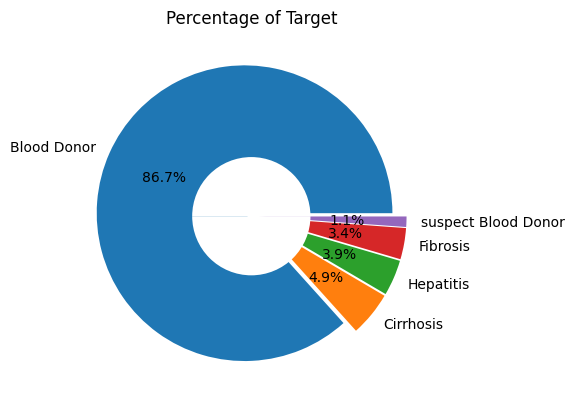

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white','white', 'white','white'])
plt.title('Percentage of Target', loc = 'center', fontsize = 12)

In [ ]:
pd.crosstab(index=df["Target"],     # Make a crosstab
                      columns="count")

col_0,count
Target,
Blood Donor,533
Cirrhosis,30
Fibrosis,21
Hepatitis,24
suspect Blood Donor,7


<ipython-input-18-2f775e2be23b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Target", data = df, palette = 'hls')


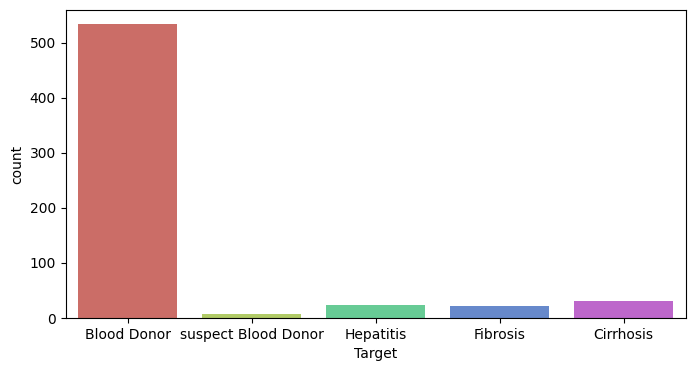

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.countplot(x = "Target", data = df, palette = 'hls')
plt.show()

 **point:** The target variable is unbalanced

### 2.Sex

In [ ]:
df['Sex'].describe()

,Sex
count,615
unique,2
top,m
freq,377


In [ ]:
df['Sex'].unique()

array(['m', 'f'], dtype=object)

In [ ]:
df8 = df.drop('Target',axis = 1)

In [ ]:
df8.groupby('Sex').mean()

,ID,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Sex,,,,,,,,,,,,
f,441.752101,47.718487,40.559244,68.930603,23.273109,29.339496,8.646218,7.727563,5.411602,71.302101,30.371849,71.696218
m,223.562334,47.212202,42.291755,67.872877,31.728191,38.224934,13.133156,8.492759,5.341230,87.591777,45.316711,72.264362


In [ ]:
freq = df['Sex'].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

Sex
m    61.300813
f    38.699187
Name: count, dtype: float64


Text(0.5, 1.0, 'Percentage of Sex')

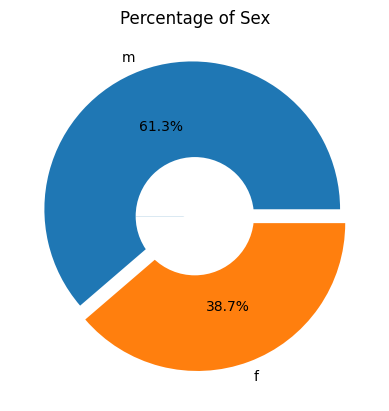

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = percentage.index, autopct = '%0.1f%%',
        explode = [0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white'])
plt.title('Percentage of Sex', loc = 'center', fontsize = 12)

In [ ]:
pd.crosstab(index=df["Sex"],     # Make a crosstab
                      columns="count")

col_0,count
Sex,
f,238
m,377


<ipython-input-26-a8659a812f5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Sex", data = df, palette = 'hls')


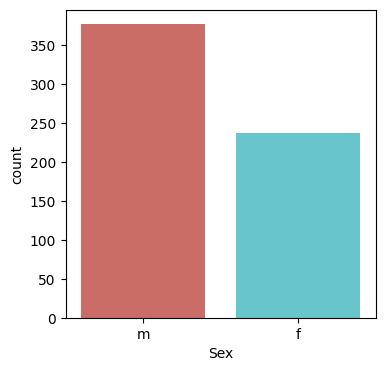

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = "Sex", data = df, palette = 'hls')
plt.show()

In [ ]:
 a = pd.crosstab(df["Target"],[df['Sex']])
 a

Sex,f,m
Target,,
Blood Donor,215,318
Cirrhosis,10,20
Fibrosis,8,13
Hepatitis,4,20
suspect Blood Donor,1,6


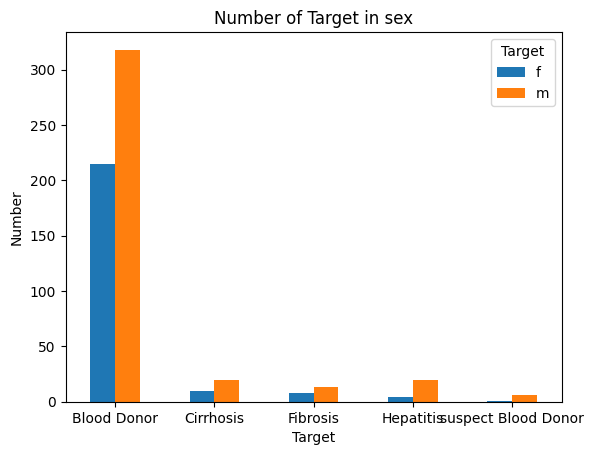

In [ ]:
a.plot.bar(stacked = False)
plt.legend(title = 'Target', loc ='upper right')
plt.title('Number of Target in sex')
plt.ylabel('Number')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
perc0_frq = df.loc[df["Target"] == "Blood Donor"]["Sex"].value_counts()
perc0_perc =perc0_frq / perc0_frq.sum() * 100
perc0s_frq = df.loc[df["Target"] == "suspect Blood Donor"]["Sex"].value_counts()
perc0s_perc = perc0s_frq / perc0s_frq.sum() * 100
perc1_frq = df.loc[df["Target"] == "Hepatitis"]["Sex"].value_counts()
perc1_perc = perc1_frq / perc1_frq.sum() * 100
perc2_frq = df.loc[df["Target"] == "Fibrosis"]["Sex"].value_counts()
perc2_perc = perc2_frq / perc2_frq.sum() * 100
perc3_frq = df.loc[df["Target"] == "Cirrhosis"]["Sex"].value_counts()
perc3_perc = perc3_frq / perc3_frq.sum() * 100

In [ ]:
perc3_perc

,count
Sex,
m,66.666667
f,33.333333


In [ ]:
state_data = pd.DataFrame({ "m"  : [perc0_perc[0],perc0s_perc[0],perc1_perc[0],
                                     perc2_perc[0],perc3_perc[0]],
                            "f" : [perc0_perc[1],perc0s_perc[1],perc1_perc[1],
                                     perc2_perc[1],perc3_perc[1]]})
state_data.index = ["Blood Donor","suspect Blood Donor","Hepatitis","Fibrosis","Cirrhosis"]
state_data

<ipython-input-31-827057493f33>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_data = pd.DataFrame({ "m"  : [perc0_perc[0],perc0s_perc[0],perc1_perc[0],
<ipython-input-31-827057493f33>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  perc2_perc[0],perc3_perc[0]],
<ipython-input-31-827057493f33>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "f" : [perc0_perc[1],perc0s_perc[1],perc1_perc[1],
<ipython-input-31-827057493f33>:

,m,f
Blood Donor,59.662289,40.337711
suspect Blood Donor,85.714286,14.285714
Hepatitis,83.333333,16.666667
Fibrosis,61.904762,38.095238
Cirrhosis,66.666667,33.333333


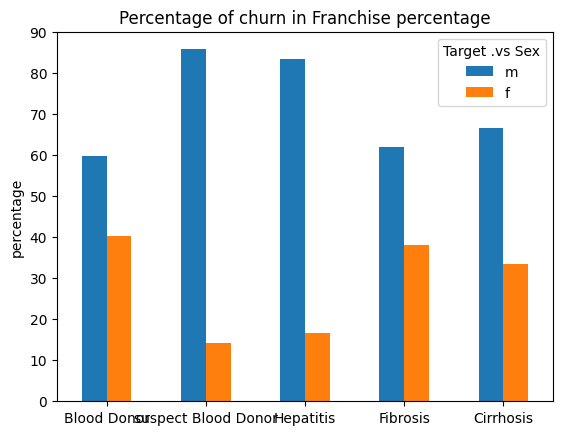

In [ ]:
state_data.plot.bar(stacked = False)
plt.legend(title = 'Target .vs Sex', loc ='upper right')
plt.title('Percentage of churn in Franchise percentage')
plt.ylabel('percentage')
plt.xticks(rotation = 0)
plt.show()

### 3.Age

In [ ]:
 df["Age"].describe()

,Age
count,615.000000
mean,47.408130
std,10.055105
min,19.000000
25%,39.000000
50%,47.000000
75%,54.000000
max,77.000000


<Axes: xlabel='Age', ylabel='Probability'>

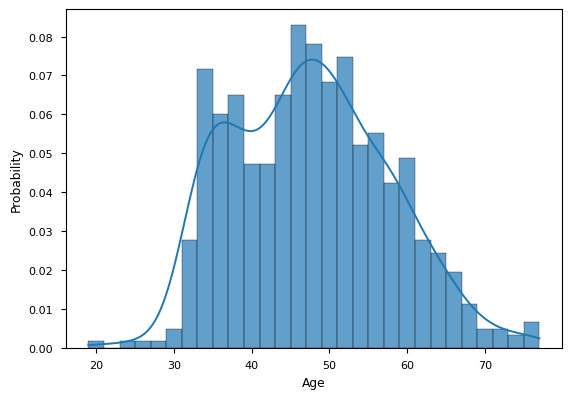

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["Age"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["Age"].min(),df["Age"].max() ,30))

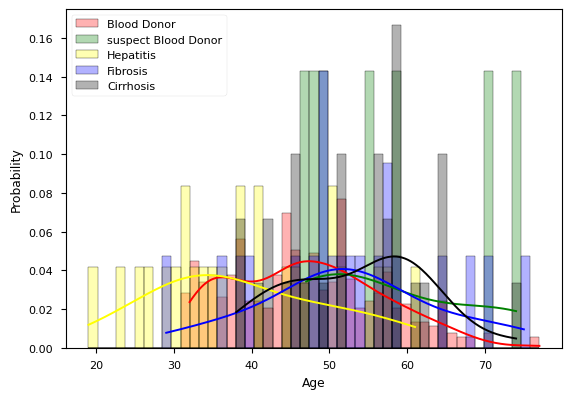

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "Age"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["Age"].min(),df["Age"].max() ,50),
             color = 'red', label = "Blood Donor")
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "Age"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["Age"].min(),df["Age"].max() ,50),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "Age"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["Age"].min(),df["Age"].max() ,50),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "Age"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["Age"].min(),df["Age"].max() ,50),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "Age"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["Age"].min(),df["Age"].max() ,50),
             color = 'black', label = 'Cirrhosis')

plt.legend()

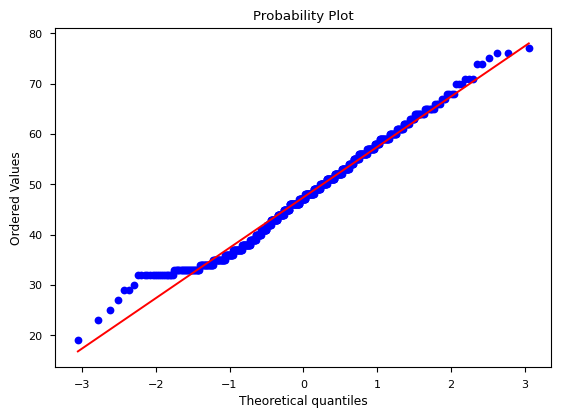

In [ ]:
import pylab
import scipy.stats as stats
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["Age"], dist="norm", plot= pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='Age'>

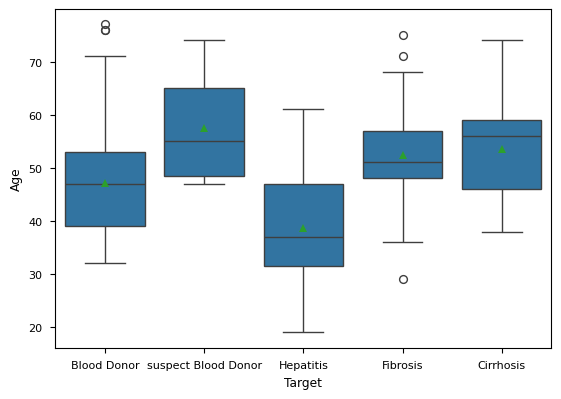

In [ ]:
#Boxplot for Two Groups
sns.boxplot(x = 'Target', y = "Age", data = df, showmeans = True)

<Axes: ylabel='Age'>

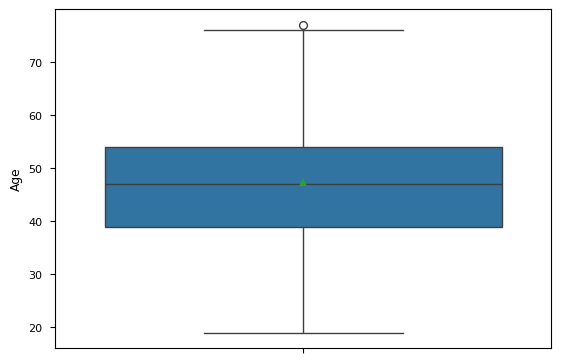

In [ ]:
sns.boxplot(data = df['Age'], showmeans = True)

### 4.ALB

In [ ]:
 df["ALB"].describe()

,ALB
count,614.000000
mean,41.620195
std,5.780629
min,14.900000
25%,38.800000
50%,41.950000
75%,45.200000
max,82.200000


<Axes: xlabel='ALB', ylabel='Probability'>

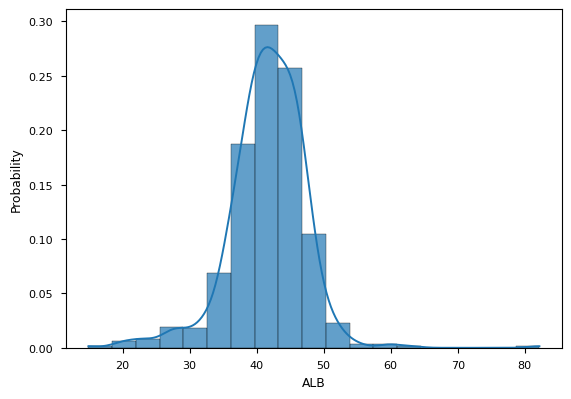

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["ALB"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["ALB"].min(),df["ALB"].max() ,20))

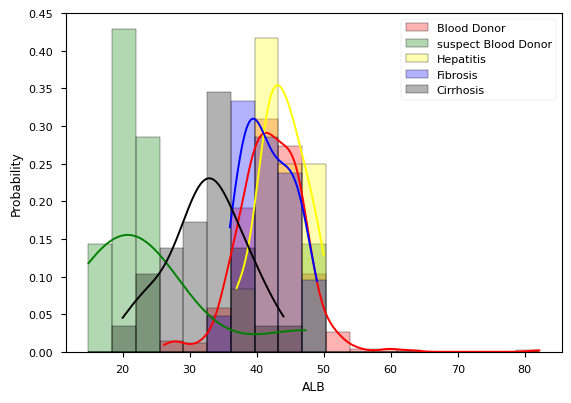

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "ALB"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALB"].min(),df["ALB"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "ALB"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALB"].min(),df["ALB"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "ALB"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALB"].min(),df["ALB"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "ALB"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALB"].min(),df["ALB"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "ALB"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALB"].min(),df["ALB"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

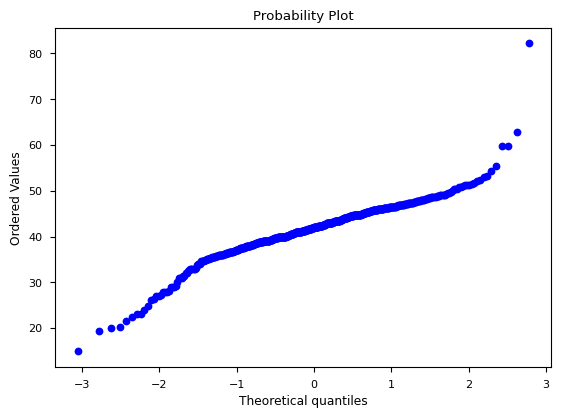

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df["ALB"], dist="norm", plot= pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='ALB'>

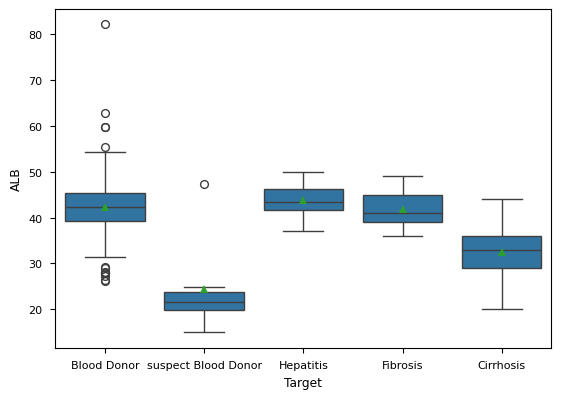

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "ALB", data = df, showmeans = True)

<Axes: ylabel='ALB'>

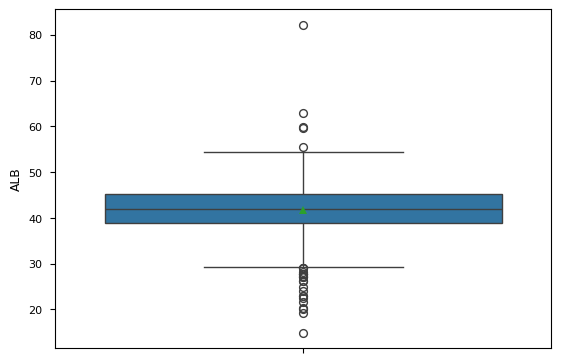

In [ ]:
sns.boxplot(data = df["ALB"], showmeans = True)

### 5.ALP

In [ ]:
 df["ALP"].describe()

,ALP
count,597.000000
mean,68.283920
std,26.028315
min,11.300000
25%,52.500000
50%,66.200000
75%,80.100000
max,416.600000


<Axes: xlabel='ALP', ylabel='Probability'>

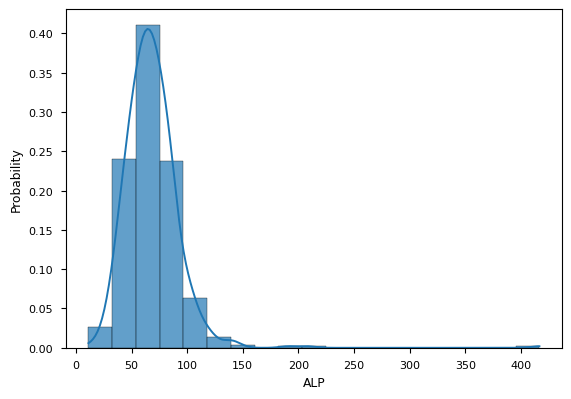

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["ALP"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["ALP"].min(),df["ALP"].max() ,20))

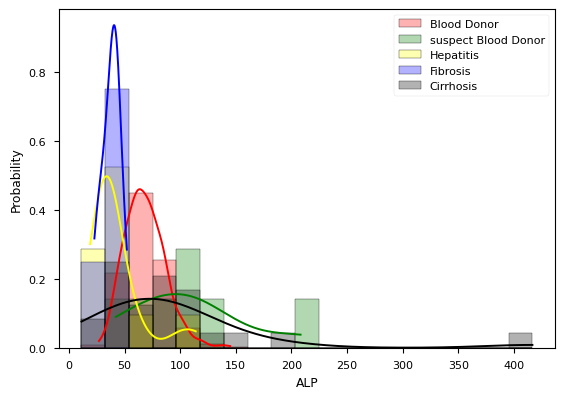

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "ALP"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALP"].min(),df["ALP"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "ALP"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALP"].min(),df["ALP"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "ALP"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALP"].min(),df["ALP"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "ALP"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALP"].min(),df["ALP"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "ALP"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALP"].min(),df["ALP"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

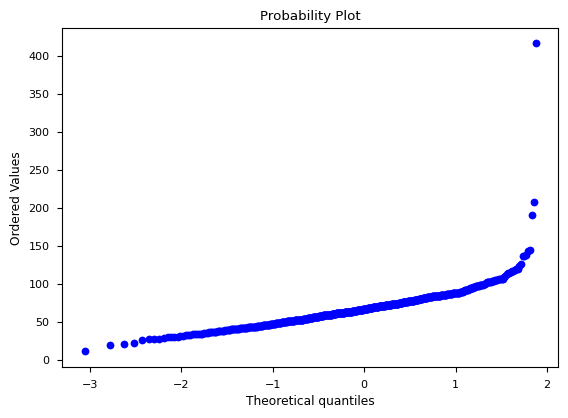

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['ALP'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='ALP'>

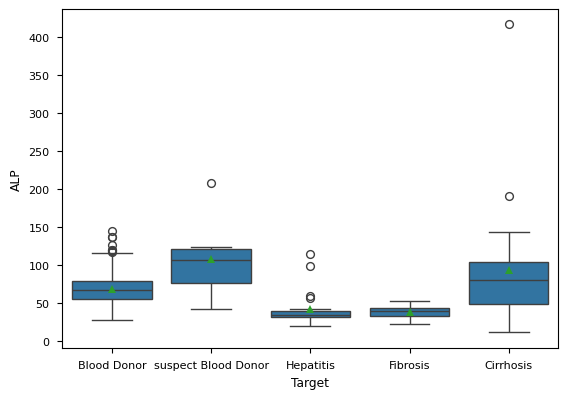

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "ALP", data = df, showmeans = True)

<Axes: ylabel='ALP'>

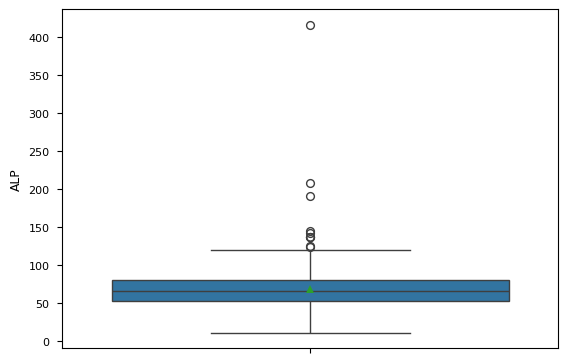

In [ ]:
sns.boxplot(data = df["ALP"], showmeans = True)

### 6.ALT

In [ ]:
 df["ALT"].describe()

,ALT
count,614.000000
mean,28.450814
std,25.469689
min,0.900000
25%,16.400000
50%,23.000000
75%,33.075000
max,325.300000


<Axes: xlabel='ALT', ylabel='Probability'>

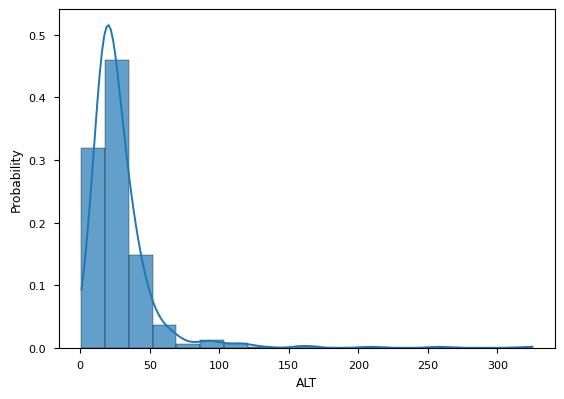

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["ALT"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["ALT"].min(),df["ALT"].max() ,20))

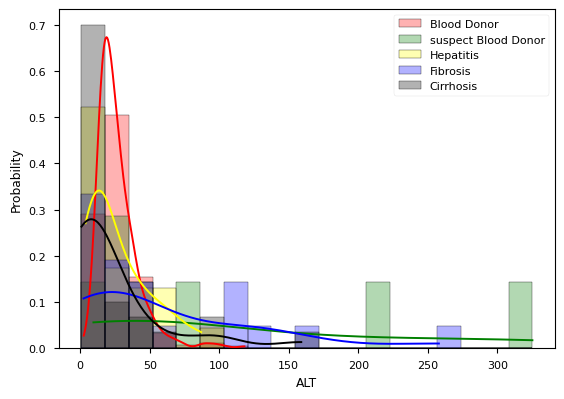

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "ALT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALT"].min(),df["ALT"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "ALT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALT"].min(),df["ALT"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "ALT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALT"].min(),df["ALT"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "ALT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALT"].min(),df["ALT"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "ALT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["ALT"].min(),df["ALT"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

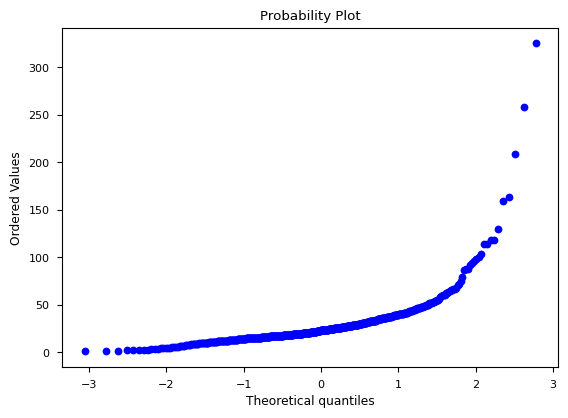

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['ALT'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='ALT'>

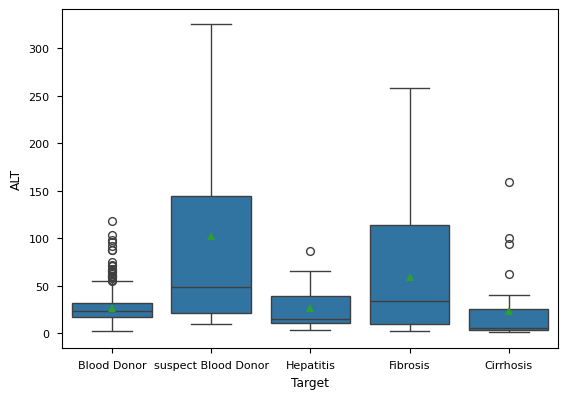

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "ALT", data = df, showmeans = True)

<Axes: ylabel='ALT'>

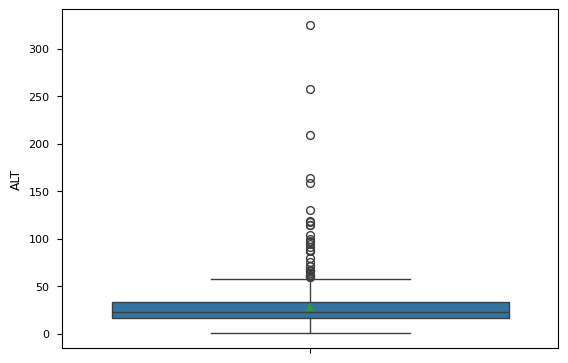

In [ ]:
sns.boxplot(data = df["ALT"], showmeans = True)

### 7.AST

In [ ]:
 df["AST"].describe()

,AST
count,615.000000
mean,34.786341
std,33.090690
min,10.600000
25%,21.600000
50%,25.900000
75%,32.900000
max,324.000000


<Axes: xlabel='AST', ylabel='Probability'>

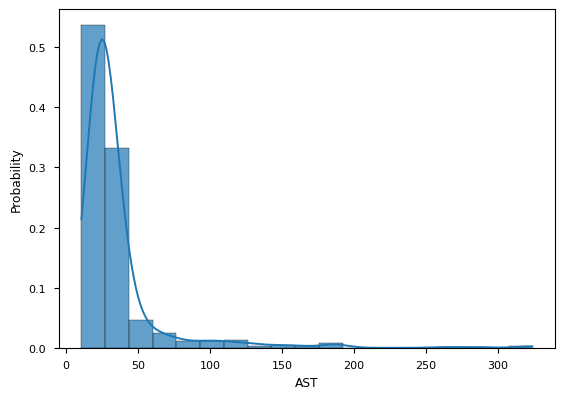

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["AST"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["AST"].min(),df["AST"].max() ,20))

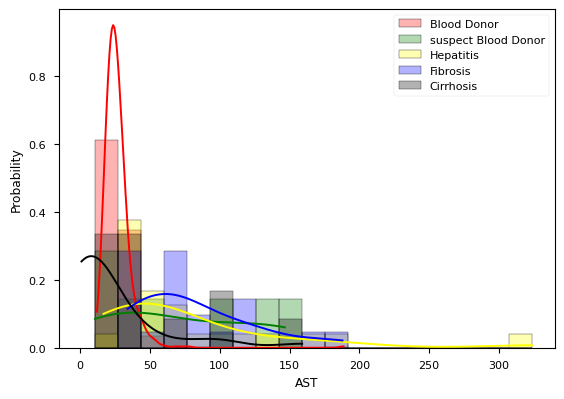

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "AST"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["AST"].min(),df["AST"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "AST"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["AST"].min(),df["AST"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "AST"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["AST"].min(),df["AST"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "AST"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["AST"].min(),df["AST"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "ALT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["AST"].min(),df["AST"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

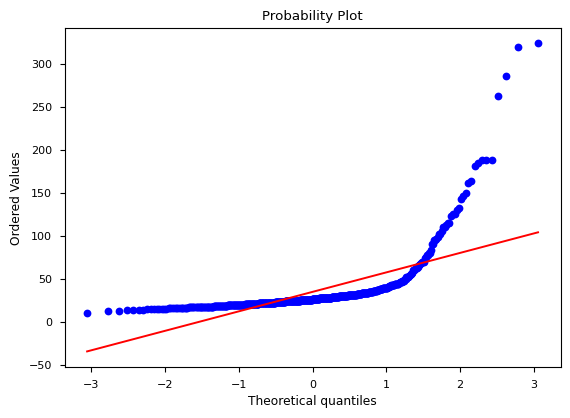

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['AST'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='AST'>

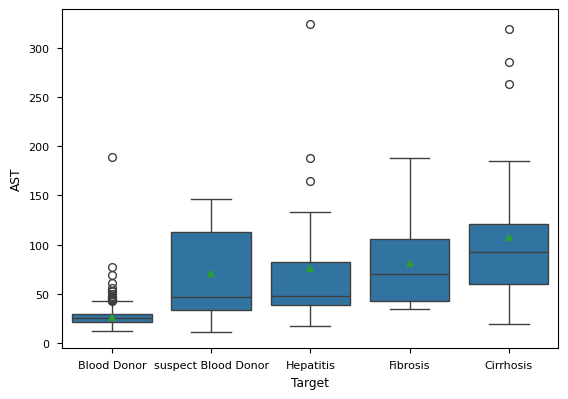

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "AST", data = df, showmeans = True)

<Axes: ylabel='AST'>

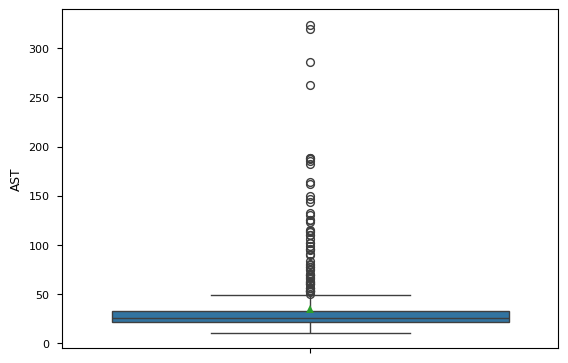

In [ ]:
sns.boxplot(data = df["AST"], showmeans = True)

### 8.BIL

In [ ]:
 df["BIL"].describe()

,BIL
count,615.000000
mean,11.396748
std,19.673150
min,0.800000
25%,5.300000
50%,7.300000
75%,11.200000
max,254.000000


<Axes: xlabel='BIL', ylabel='Probability'>

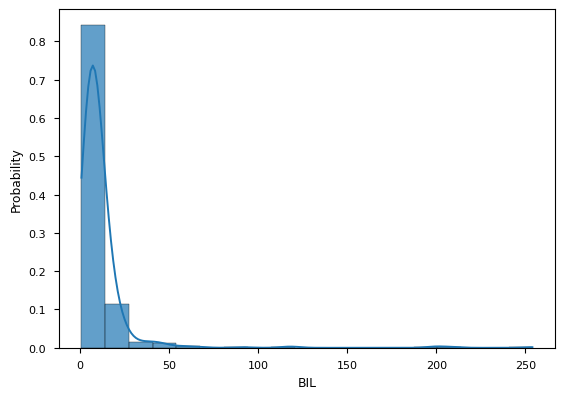

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["BIL"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["BIL"].min(),df["BIL"].max() ,20))

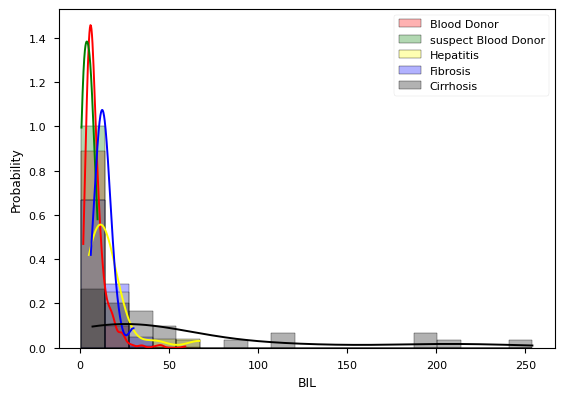

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "BIL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["BIL"].min(),df["BIL"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "BIL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["BIL"].min(),df["BIL"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "BIL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["BIL"].min(),df["BIL"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "BIL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["BIL"].min(),df["BIL"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "BIL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["BIL"].min(),df["BIL"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

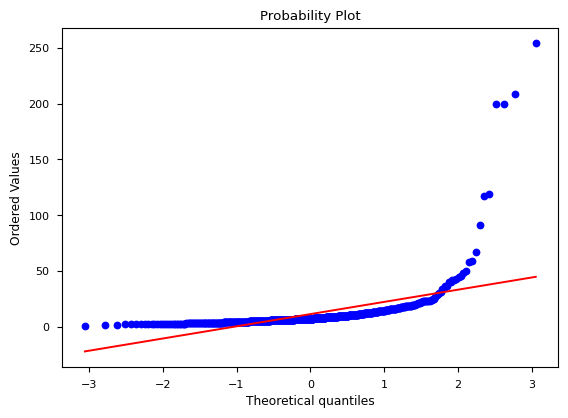

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['BIL'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='BIL'>

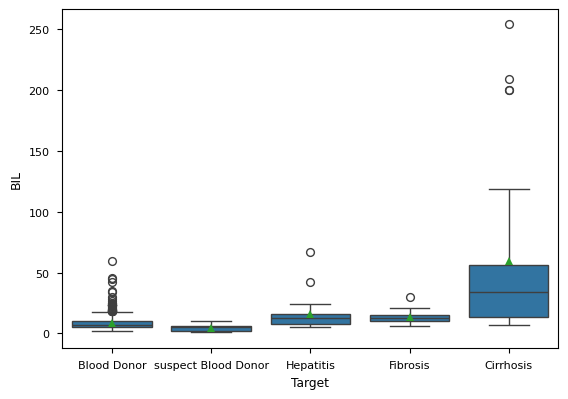

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "BIL", data = df, showmeans = True)

<Axes: ylabel='BIL'>

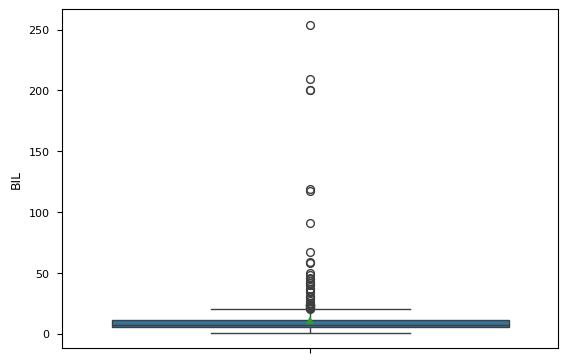

In [ ]:
sns.boxplot(data = df["BIL"], showmeans = True)

### 9.CHE

In [ ]:
 df["CHE"].describe()

,CHE
count,615.000000
mean,8.196634
std,2.205657
min,1.420000
25%,6.935000
50%,8.260000
75%,9.590000
max,16.410000


<Axes: xlabel='CHE', ylabel='Probability'>

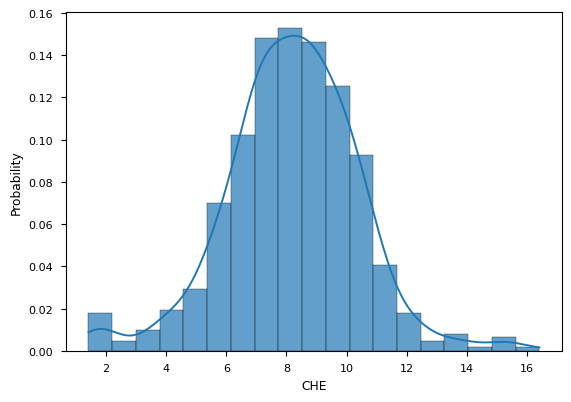

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["CHE"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["CHE"].min(),df["CHE"].max() ,20))

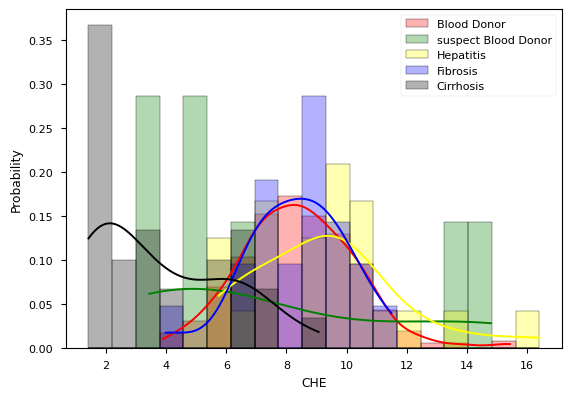

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "CHE"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHE"].min(),df["CHE"].max() ,20),
             color = 'red', label = "Blood Donor")
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "CHE"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHE"].min(),df["CHE"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "CHE"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHE"].min(),df["CHE"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "CHE"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHE"].min(),df["CHE"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "CHE"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHE"].min(),df["CHE"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

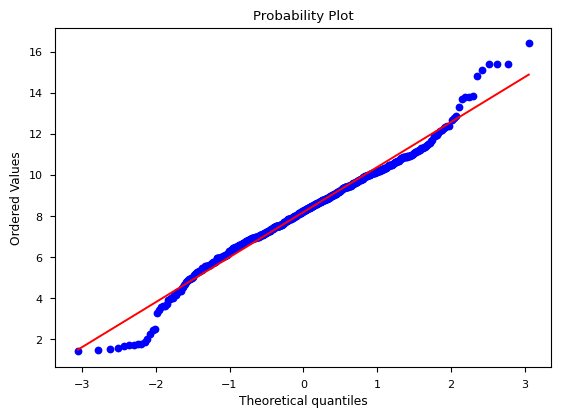

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['CHE'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='CHE'>

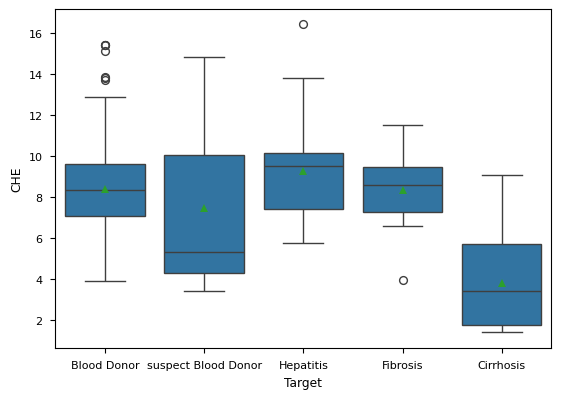

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 4)
sns.boxplot(x = 'Target', y = "CHE", data = df, showmeans = True)

<Axes: ylabel='CHE'>

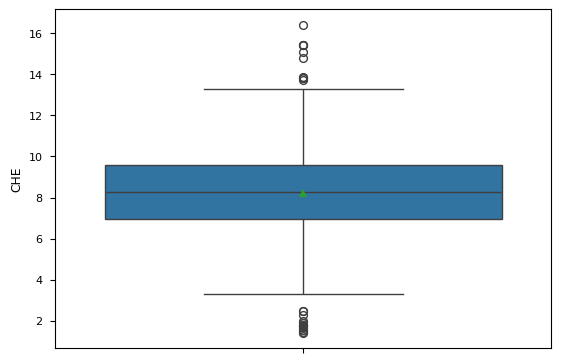

In [ ]:
#fig, ax = plt.subplots()
#fig.set_size_inches(3, 4)
sns.boxplot( data = df["CHE"], showmeans = True)

### 10.CHOL

In [ ]:
 df["CHOL"].describe()

,CHOL
count,605.000000
mean,5.368099
std,1.132728
min,1.430000
25%,4.610000
50%,5.300000
75%,6.060000
max,9.670000


<Axes: xlabel='CHOL', ylabel='Probability'>

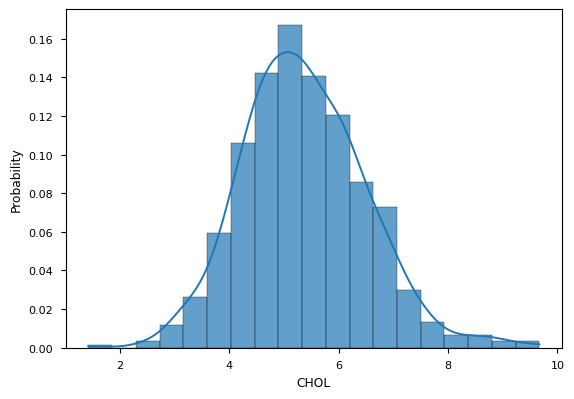

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["CHOL"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["CHOL"].min(),df["CHOL"].max() ,20))

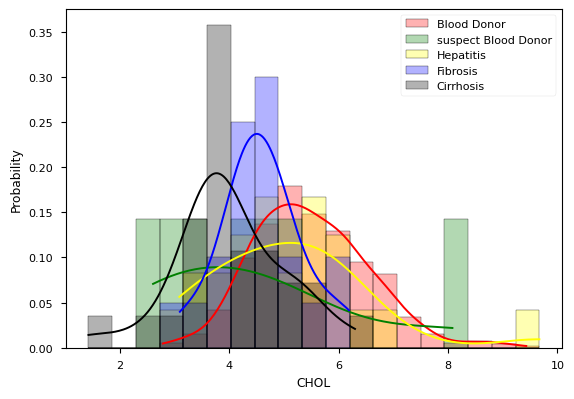

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "CHOL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHOL"].min(),df["CHOL"].max() ,20),
             color = 'red', label = "Blood Donor")
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "CHOL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHOL"].min(),df["CHOL"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "CHOL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHOL"].min(),df["CHOL"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "CHOL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHOL"].min(),df["CHOL"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "CHOL"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CHOL"].min(),df["CHOL"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

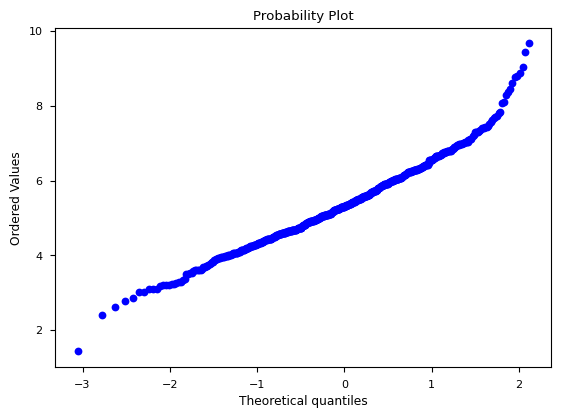

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['CHOL'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='CHOL'>

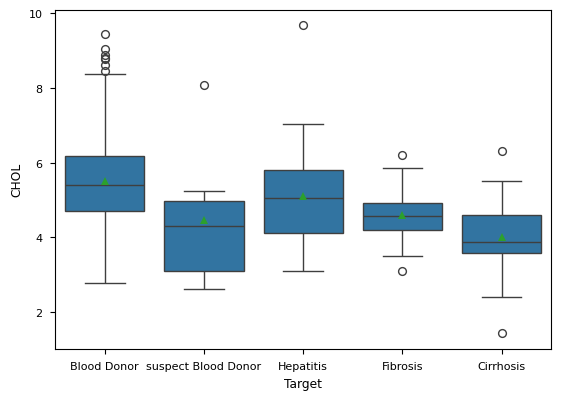

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "CHOL", data = df, showmeans = True)

<Axes: ylabel='CHOL'>

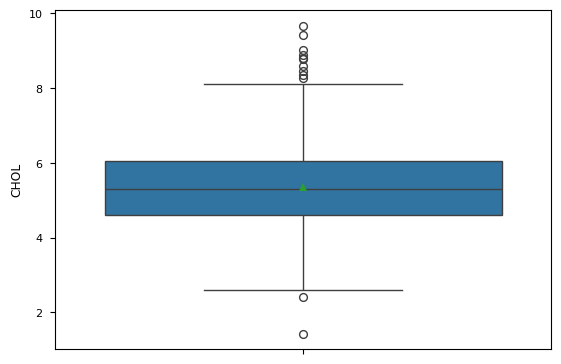

In [ ]:
sns.boxplot(data= df["CHOL"] , showmeans = True)

### 11.CREA

In [ ]:
 df["CREA"].describe()

,CREA
count,615.000000
mean,81.287805
std,49.756166
min,8.000000
25%,67.000000
50%,77.000000
75%,88.000000
max,1079.100000


<Axes: xlabel='CREA', ylabel='Probability'>

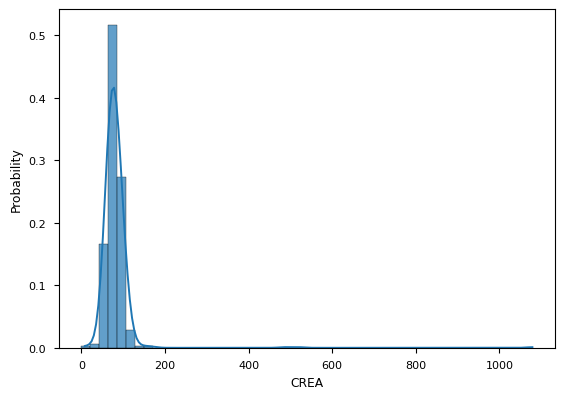

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["CREA"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(0,300,15))

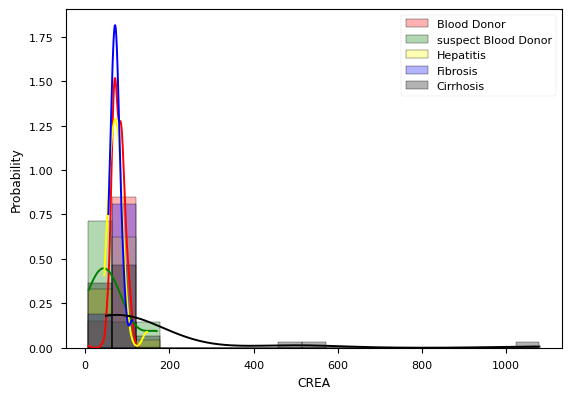

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "CREA"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CREA"].min(),df["CREA"].max() ,20),
             color = 'red', label = "Blood Donor")
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "CREA"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CREA"].min(),df["CREA"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "CREA"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CREA"].min(),df["CREA"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "CREA"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CREA"].min(),df["CREA"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "CREA"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["CREA"].min(),df["CREA"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

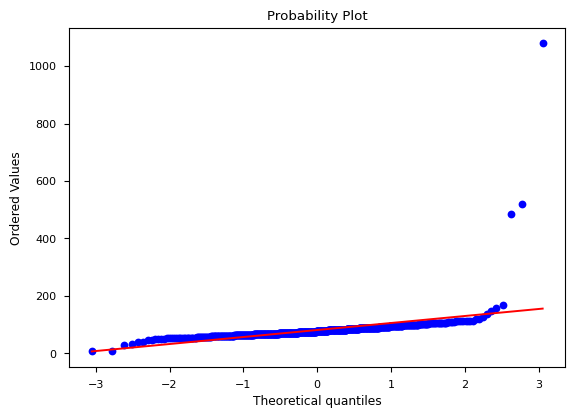

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['CREA'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='CREA'>

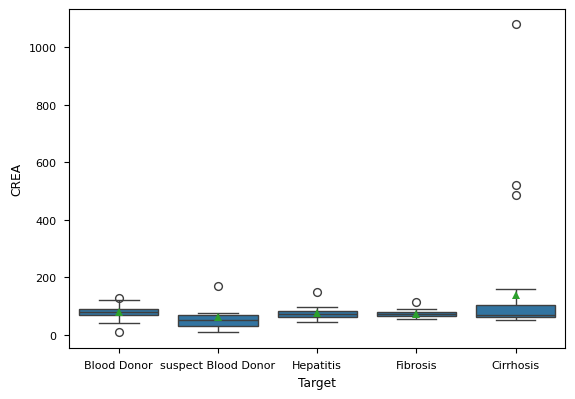

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "CREA", data = df, showmeans = True)

<Axes: ylabel='CREA'>

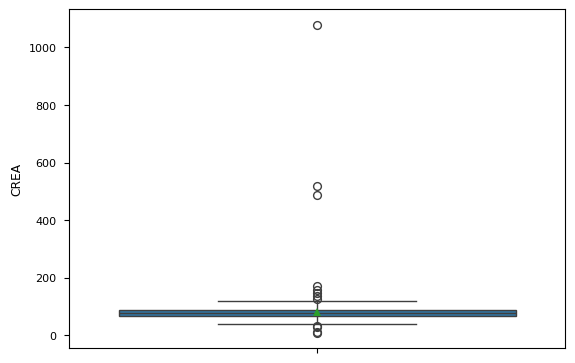

In [ ]:
sns.boxplot(data = df['CREA'], showmeans = True)

### 12.GGT

In [ ]:
 df["GGT"].describe()

,GGT
count,615.000000
mean,39.533171
std,54.661071
min,4.500000
25%,15.700000
50%,23.300000
75%,40.200000
max,650.900000


<Axes: xlabel='GGT', ylabel='Probability'>

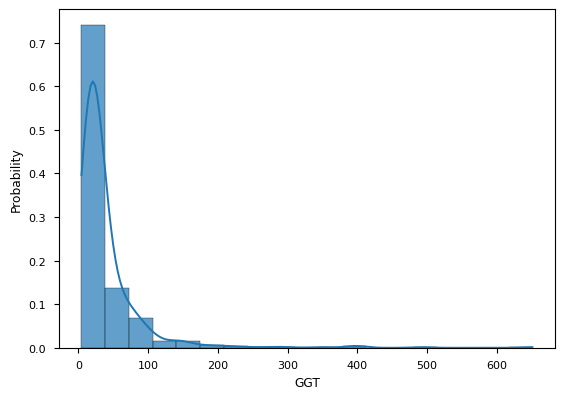

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["GGT"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["GGT"].min(),df["GGT"].max() ,20))

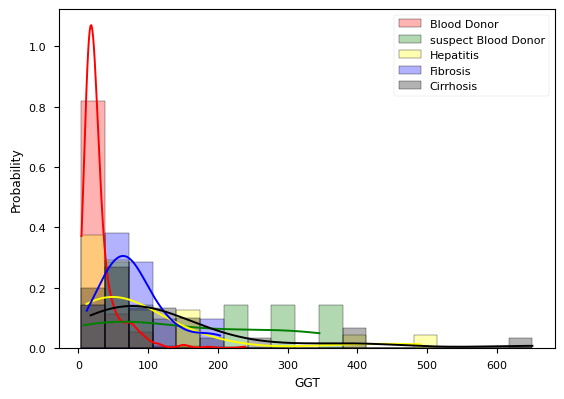

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "GGT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["GGT"].min(),df["GGT"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "GGT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["GGT"].min(),df["GGT"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "GGT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["GGT"].min(),df["GGT"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "GGT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["GGT"].min(),df["GGT"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "GGT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["GGT"].min(),df["GGT"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

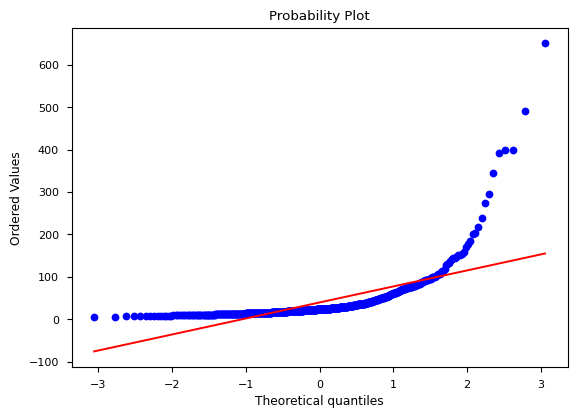

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['GGT'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='GGT'>

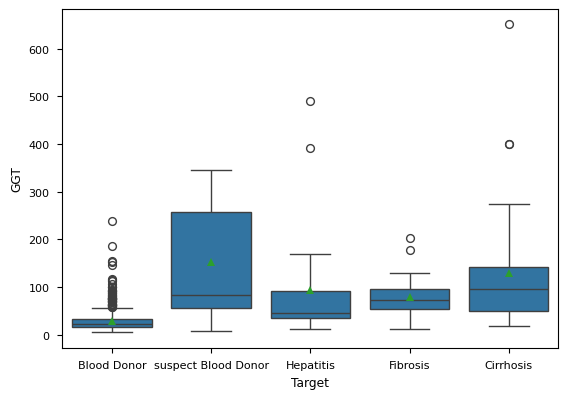

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "GGT", data = df, showmeans = True)

<Axes: ylabel='GGT'>

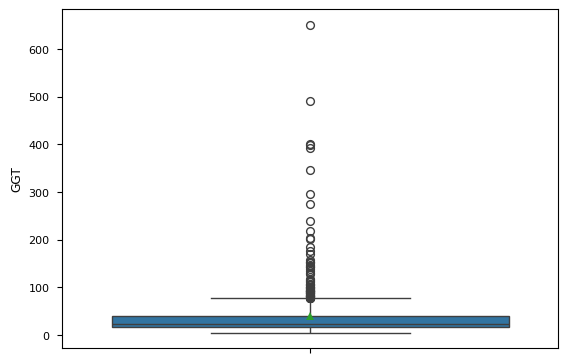

In [ ]:
sns.boxplot(data = df["GGT"], showmeans = True)

### 13.PROT

In [ ]:
 df["PROT"].describe()

,PROT
count,614.000000
mean,72.044137
std,5.402636
min,44.800000
25%,69.300000
50%,72.200000
75%,75.400000
max,90.000000


<Axes: xlabel='PROT', ylabel='Probability'>

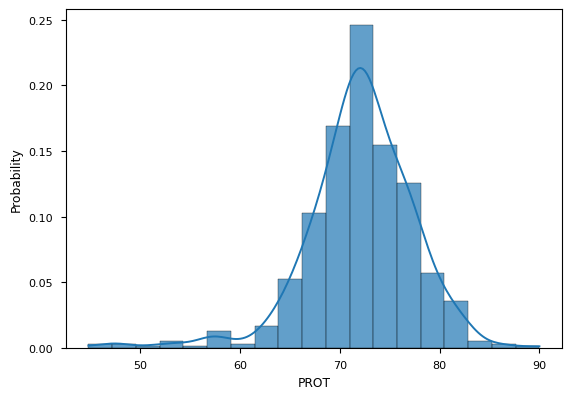

In [ ]:
#Kernel Density Estimates (KDE)
sns.histplot(df["PROT"], stat = 'probability', kde = True, alpha = 0.7,
             bins = np.linspace(df["PROT"].min(),df["PROT"].max() ,20))

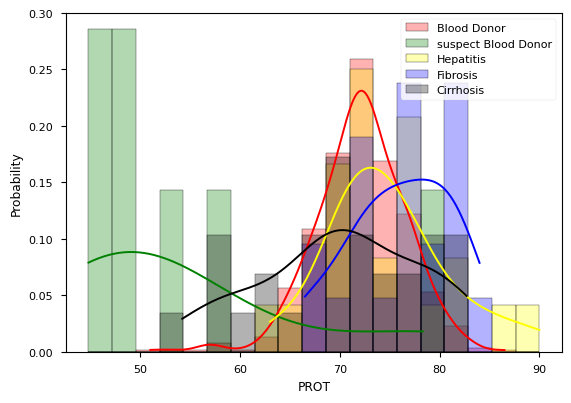

In [ ]:
#Density Function for Two Groups
#sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df.loc[df['Target'] == "Blood Donor", "PROT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["PROT"].min(),df["PROT"].max() ,20),
             color = 'red', label = 'Blood Donor')
sns.histplot(df.loc[df['Target'] == 'suspect Blood Donor',  "PROT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["PROT"].min(),df["PROT"].max() ,20),
             color = 'green', label = 'suspect Blood Donor')
sns.histplot(df.loc[df['Target'] == 'Hepatitis',  "PROT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["PROT"].min(),df["PROT"].max() ,20),
             color = 'yellow', label = 'Hepatitis')
sns.histplot(df.loc[df['Target'] == 'Fibrosis',  "PROT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["PROT"].min(),df["PROT"].max() ,20),
             color = 'blue', label = 'Fibrosis')
sns.histplot(df.loc[df['Target'] == 'Cirrhosis',  "PROT"], stat = 'probability', kde = True,
             alpha = 0.3, bins = np.linspace(df["PROT"].min(),df["PROT"].max() ,20),
             color = 'black', label = 'Cirrhosis')

plt.legend()

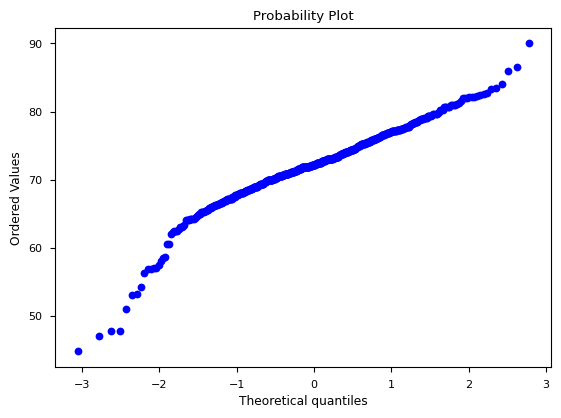

In [ ]:
#sns.set(rc={'figure.figsize':(5,5)})
stats.probplot(df['PROT'], dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Target', ylabel='PROT'>

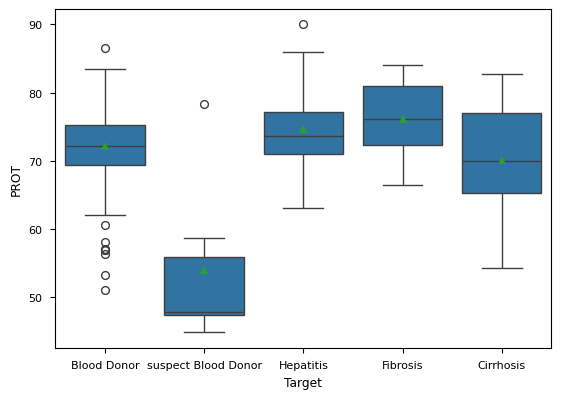

In [ ]:
#Boxplot for Two Groups
#fig, ax = plt.subplots()
#fig.set_size_inches(8, 8)
sns.boxplot(x = 'Target', y = "PROT", data = df, showmeans = True)

<Axes: ylabel='PROT'>

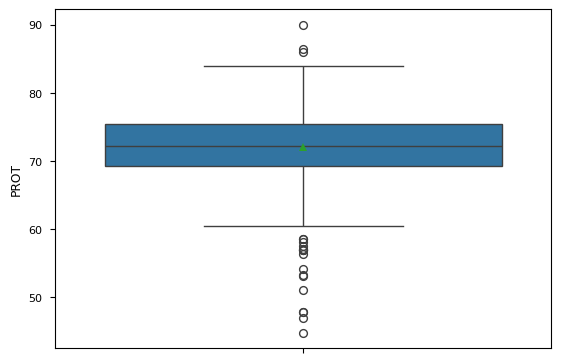

In [ ]:
sns.boxplot(data = df['PROT'], showmeans = True)

### general

In [ ]:
df8 = df.drop(['Sex','ID'],axis = 1)

In [ ]:
df8["Target"] = df8["Target"].map({'Blood Donor':1, 'suspect Blood Donor':2, 'Hepatitis':3, 'Fibrosis':3,
       'Cirrhosis':4})

In [ ]:
corr = df8.corr()
corr

,Target,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Target,1.000000,0.081397,-0.283180,0.021018,0.100193,0.652815,0.465332,-0.311982,-0.302191,0.174673,0.483600,-0.000913
Age,0.081397,1.000000,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
ALB,-0.283180,-0.197498,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.021018,0.173340,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,0.100193,-0.006021,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.652815,0.088666,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.465332,0.032492,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.311982,-0.075093,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,-0.302191,0.125641,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,0.174673,-0.022296,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704


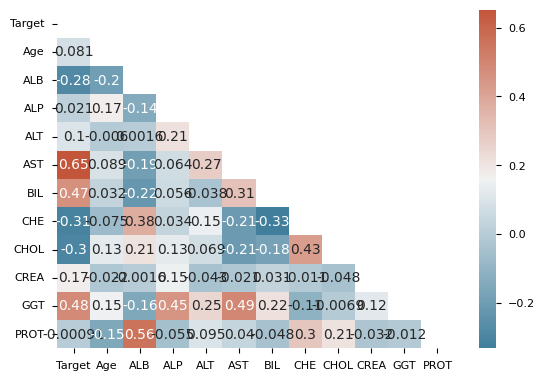

In [ ]:
#fig, ax = plt.subplots(figsize=(11, 9))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.tick_params(axis='x', rotation=45)
fig.savefig('relation_mat.png')

# Data Preprocessing

### Remove extra columns

In [ ]:
df = df.drop(["ID"], axis = 1)
df.head()

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df["Target"] = df["Target"].map({'Blood Donor':1, 'suspect Blood Donor':2, 'Hepatitis':3, 'Fibrosis':4,
       'Cirrhosis':5})
df["Sex"] = df["Sex"].map({'m':1, 'f':2})
df.head()

,Target,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,1,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,1,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,1,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Missing Value

In [ ]:
df.isnull().any()

,0
Target,False
Age,False
Sex,False
ALB,True
ALP,True
ALT,True
AST,False
BIL,False
CHE,False
CHOL,True


In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
import missingno as mi
# Generate the missingno plot:

mi.matrix(df)
plt.show()

In [ ]:
# Seaborn heatmaps can also visualize the presence of null data, to
# include where that data occurs spatially within the dataframe

plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Final_Coded")
plt.show()

### Dealing with Missing Value

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer


In [ ]:
df.tail()

In [ ]:
df_y = df['Target']
df_y.head()

In [ ]:
df_sex = df['Sex']
df_sex.tail()

In [ ]:
df.head()

In [ ]:
df_x = df
imputer = KNNImputer(n_neighbors=5)
transformed_df = imputer.fit_transform(df_x)

In [ ]:
data = pd.DataFrame(transformed_df, columns = ['Target','Age','Sex','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'])
data.tail()

In [ ]:
data_all = data

In [ ]:
# Seaborn heatmaps can also visualize the presence of null data, to
# include where that data occurs spatially within the dataframe

plt.subplots(figsize=(15,5))
sns.heatmap(data_all.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Final_Coded")
plt.show()

In [ ]:
df.isnull().any()

In [ ]:
data_all.isnull().any()

In [ ]:
data_all.head()

### Dealing with imbalanced data

#### 1.Random over sampling

In [ ]:
data_all.head()

In [ ]:
x = data_all.drop(["Target"], axis=1)
y = data_all["Target"]
y.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(x, y)

In [ ]:
data_ros = pd.DataFrame(y_ros)
data_ros.describe()

In [ ]:
from collections import Counter
print(sorted(Counter(y_ros).items()))

In [ ]:
data_ros.head()

In [ ]:
df_ros = x_ros
df_ros["Target"] = y_ros
df_ros.tail()

In [ ]:
df_ros.info()

In [ ]:
df_ros.head()

#### 2.SMOTE-NC

In [ ]:
from imblearn.over_sampling import SMOTE
#Obatin column index for categorical features
cat_col_index = list([0])

sm = SMOTE(random_state=123)
x_smt, y_smt = sm.fit_resample(x, y)

In [ ]:
print(sorted(Counter(y_smt).items()))

In [ ]:
df_smt = pd.DataFrame(y_smt)
df_smt.describe()

In [ ]:
df_smt = x_smt
df_smt["Target"] = y_smt
df_smt.info()

In [ ]:
freq = df_smt['Target'].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = ['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'], autopct = '%0.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white','white', 'white','white'])
plt.title('Percentage of Target', loc = 'center', fontsize = 12)

####3.ADASYN

In [ ]:
data_ada = data_all
X = data_ada.drop(["Target"], axis=1)
y = data_ada["Target"]
y.head()

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
df_ada = X_res
df_ada["Target"] = y_res
df_ada.head(
)

In [ ]:
freq = df_ada['Target'].value_counts()
percentage = freq / freq.sum() * 100
print(percentage)

In [ ]:
#A Fancy Pie Chart!
plt.pie(percentage, labels = ['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'], autopct = '%0.1f%%',
        explode = [0.05, 0.05, 0.05, 0.05, 0.05])
plt.pie([1, 1], labels = None, radius = 0.4, colors = ['white', 'white','white', 'white','white'])
plt.title('Percentage of Target', loc = 'center', fontsize = 12)

###Min Max normalization

####1.ROS

In [ ]:
df_c_ros = df_ros.drop(["Target"], axis=1)

In [ ]:
df_c_ros = df_c_ros.drop(["Sex"], axis=1)


In [ ]:
df_c_ros.head()

In [ ]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_c_ros = scaler.fit_transform(df_c_ros)
df_MX_ros = pd.DataFrame(data_c_ros, columns = ['Age','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'])
df_MX_ros.tail()

In [ ]:
df_MX_ros["Sex"] = df_ros["Sex"]
df_MX_ros["Target"] = df_ros["Target"]
df_MX_ros.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex,Target
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,1.0,1.0
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,1.0,1.0
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,1.0,1.0
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,1.0,1.0
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,1.0,1.0


####2.SMT

In [ ]:
df_c_smt = df_smt.drop(["Target"], axis=1)
df_c_smt = df_c_smt.drop(["Sex"], axis=1)


In [ ]:
df_c_smt.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_c_smt = scaler.fit_transform(df_c_smt)
df_MX_smt = pd.DataFrame(data_c_smt, columns = ['Age','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'])
df_MX_smt.tail()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
2660,0.723374,0.227604,0.186013,0.011581,0.275074,0.352336,0.012355,0.258123,0.051279,0.082373,0.641159
2661,0.901778,0.155086,0.063175,0.005417,0.265928,0.094379,0.069529,0.234238,0.051426,0.068249,0.342529
2662,0.614572,0.358098,0.168149,0.085887,0.507859,0.066121,0.120886,0.319974,0.051726,0.611528,0.717099
2663,0.648563,0.160063,0.204317,0.013010,0.350186,0.161796,0.032070,0.149649,0.061720,0.055255,0.452802
2664,0.689655,0.198173,0.163745,0.010891,0.204019,0.709906,0.051479,0.260810,0.056238,0.049137,0.403609


In [ ]:
df_MX_smt["Sex"] = df_smt["Sex"]
df_MX_smt["Target"] = df_smt["Target"]
df_MX_smt.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex,Target
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,1.0,1.0
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,1.0,1.0
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,1.0,1.0
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,1.0,1.0
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,1.0,1.0


####3.ADA

In [ ]:
df_c_ada = df_ada.drop(["Target"], axis=1)
df_c_ada = df_c_ada.drop(["Sex"], axis=1)


In [ ]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_c_ada = scaler.fit_transform(df_c_ada)
df_MX_ada = pd.DataFrame(data_c_ada, columns = ['Age','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'])
df_MX_ada.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761


In [ ]:
df_MX_ada["Sex"] = df_ada["Sex"]
df_MX_ada["Target"] = df_ada["Target"]
df_MX_ada.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex,Target
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,1.0,1.0
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,1.0,1.0
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,1.0,1.0
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,1.0,1.0
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,1.0,1.0


# Machin Learning Algorithem

## Ensemble learning

## 1.Voting Classifier

### ROS_Data

In [ ]:
#Lets import the libraries and datasets
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

import statistics as stat

In [ ]:
df_MX_ros.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex,Target
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,1.0,1.0
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,1.0,1.0
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,1.0,1.0
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,1.0,1.0
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,1.0,1.0


In [ ]:
# Separation of independent variables and response variable
data = df_MX_ros
data_x = data.drop(["Target"], axis=1)
data_y = data.iloc[:,-1]


In [ ]:
data_x.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,1.0
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,1.0
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,1.0
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,1.0
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,1.0


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1998, 12)
(1998,)
(667, 12)
(667,)


In [ ]:
#We initialize the models
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = SVC(kernel='rbf', probability=True)

In [ ]:
emodel = VotingClassifier(estimators=[('dt', model1), ('knn', model2),
                                    ('svc', model3)],
                        voting='soft')
rcf_res = emodel.fit(X_train, y_train)
rcf_res

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [ ]:
#The accuracy score for the ensemble model is
escore=emodel.score(X_test, y_test)
print(escore)

0.9625187406296851


In [ ]:
y_pred = emodel.predict(X_test)
y_pred.shape

(667,)

In [ ]:
y_pred_prob = emodel.predict_proba(X_test)

In [ ]:
y_test.shape

(667,)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9638878620515261

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9625187406296851

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.9633077930069399

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.9652478418267891

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])


In [ ]:
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])

In [ ]:
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])

In [ ]:
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
nameclasses = np.array(['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'])

In [ ]:
nameclasses

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

### SMT_Data

In [ ]:
# Separation of independent variables and response variable
data = df_MX_smt
data_x = data.drop(["Target"], axis=1)
data_y = data.iloc[:,-1]


In [ ]:
data_x.head()

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#We initialize the models
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = SVC(kernel='rbf', probability=True)

In [ ]:
emodel = VotingClassifier(estimators=[('dt', model1), ('knn', model2),
                                    ('svc', model3)],
                        voting='soft')
rcf_res = emodel.fit(X_train, y_train)
rcf_res

In [ ]:
#The accuracy score for the ensemble model is
escore=emodel.score(X_test, y_test)
print(escore)

In [ ]:
y_pred = emodel.predict(X_test)
y_pred.shape

In [ ]:
y_pred_prob = emodel.predict_proba(X_test)

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])


In [ ]:
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])

In [ ]:
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])


In [ ]:
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

### ADA_Data

In [ ]:
# Separation of independent variables and response variable
data = df_MX_ada
data_x = data.drop(["Target"], axis=1)
data_y = data.iloc[:,-1]

In [ ]:
data_x.head()

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#We initialize the models
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=10)
model3 = SVC(kernel='rbf', probability=True)

In [ ]:
emodel = VotingClassifier(estimators=[('dt', model1), ('knn', model2),
                                    ('svc', model3)],
                        voting='soft')
rcf_res = emodel.fit(X_train, y_train)
rcf_res

In [ ]:
#The accuracy score for the ensemble model is
escore=emodel.score(X_test, y_test)
print(escore)

In [ ]:
y_pred = emodel.predict(X_test)
y_pred.shape

In [ ]:
y_pred_prob = emodel.predict_proba(X_test)

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])


In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])


In [ ]:
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])

In [ ]:
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])

In [ ]:
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

## 2.Bagging

### ROS_Data

#### bagging use RandomForest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rfc = RandomForestClassifier( n_estimators=100, random_state=1, n_jobs=-1, oob_score=True)
rcf_res = rfc.fit(X_train, y_train)
rcf_res

In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
rfc.score(X_test,y_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic_bagging')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
Importance = pd.DataFrame({'Importance':rcf_res.feature_importances_ },
                          index = X_train.iloc[:,:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'darkblue')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### SMT_Data

#### bagging use RandomForest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rfc = RandomForestClassifier( n_estimators=100, random_state=1, n_jobs=-1, oob_score=True)
rcf_res = rfc.fit(X_train, y_train)
rcf_res

In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
rfc.score(X_test,y_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
Importance = pd.DataFrame({'Importance':rcf_res.feature_importances_ },
                          index = X_train.iloc[:,:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'darkblue')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### ADA_Data

#### bagging use RandomForest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rfc = RandomForestClassifier( n_estimators=100, random_state=1, n_jobs=-1, oob_score=True)
rcf_res = rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
rfc.score(X_test,y_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
Importance = pd.DataFrame({'Importance':rcf_res.feature_importances_ },
                          index = X_train.iloc[:,:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'darkblue')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
%pip install shap

In [ ]:

import shap
from shap import summary_plot

feature_names = list(df_MX_ada.columns[:-1])
explainer = shap.Explainer(rfc.predict, X_train, feature_names = feature_names)
shap_values = explainer(X_test)

In [ ]:
shap.summary_plot(shap_values,X_test,plot_type = "bar")

In [ ]:
shap.summary_plot(shap_values,X_test)

## 3.Boosting

### AdaBoost

#### ROS_Data

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# Separation of independent variables and response variable
data = df_MX_ros
data_x = data.drop(["Target"], axis=1)
data_y = data.iloc[:,-1]

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0),algorithm="SAMME")
clf_res = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
Importance = pd.DataFrame({'Importance':clf_res.feature_importances_ },
                          index = X_train.iloc[:,:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'darkblue')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### SMT_Data

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# Separation of independent variables and response variable
data = df_MX_smt
data_x = data.drop(["Target"], axis=1)
data_y = data.iloc[:,-1]

In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0),algorithm="SAMME")
clf_res = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
Importance = pd.DataFrame({'Importance':clf_res.feature_importances_ },
                          index = X_train.iloc[:,:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'darkblue')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

#### ADA_Data

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

In [ ]:
# Separation of independent variables and response variable
data = df_MX_ada
data_x = data.drop(["Target"], axis=1)
data_y = data.iloc[:,-1]


In [ ]:
#Lets split our data in train and test
X_train,X_test,y_train,y_test=train_test_split(data_x,data_y,random_state=1)

In [ ]:
#Lets check the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0),algorithm="SAMME")
clf_res = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
roc_auc_score(y_test, y_pred, average='micro')

In [ ]:
#Confusion Matrix for Test Dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix
cm

In [ ]:
#sns.set(rc={'figure.figsize':(6,5)})
y_test_ =pd.get_dummies(data = y_test, columns = ['Target'])
y_test_ = label_binarize(y_test_, classes=[0, 1, 2, 3, 4])
y_pred_ = pd.DataFrame(y_pred,columns=["Target"])
y_pred_ =pd.get_dummies(data = y_pred_, columns = ['Target'])
y_pred_ = label_binarize(y_pred_, classes=[0, 1, 2, 3, 4])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
nameclass = ["Blood Donor","Cirrhosis","Fibrosis","Hepatitis","suspect Blood Donor"]
n_classes = len(nameclass)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_pred_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green',"yellow","black"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,linestyle='--',
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(nameclass[i], roc_auc[i]))
# Setting the background color of the plot
# using set_facecolor() method

plt.plot([0, 1], [0, 1],'-', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right",fontsize=8)
plt.show()

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu', xticklabels=nameclasses , yticklabels=nameclasses)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [ ]:
Importance = pd.DataFrame({'Importance':clf_res.feature_importances_ },
                          index = X_train.iloc[:,:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'darkblue')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None